<a href="https://colab.research.google.com/github/selvimaharanip/bi-analyst-portfolio/blob/main/bootcamp-projects/customer-segmentation/customer_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation with K-Means Clustering

Customer Segmentation with K-Means Clustering is used to group customers with similar characteristics or behaviors into distinct segments. Its function is to help businesses better understand customer patterns, enable targeted marketing and personalization, optimize product and service strategies, and support more effective data-driven decision making.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

df_data = pd.read_csv("/content/drive/MyDrive/Bootcamp/Sample data/transactions sesi 13.csv")

# Data Exploration and Preparation

In [ ]:
df_data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
df_data.shape

(641914, 23)

In [ ]:
df_data.dtypes

,0
accountNumber,int64
customerId,int64
creditLimit,int64
availableMoney,float64
transactionDateTime,object
transactionAmount,float64
merchantName,object
acqCountry,object
merchantCountryCode,object
posEntryMode,float64


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
df_data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
df_data.describe(include=object)

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-01-19T04:26:56,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


# Exploratory Data Analysis

In [ ]:
df_data.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,550.82,False,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,808.61,False,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,808.61,True,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,820.15,True,False


## Univariate Analysis

In [ ]:
sns.set(style="whitegrid")

### Exploration of Categorical Data Types

1. transactionType

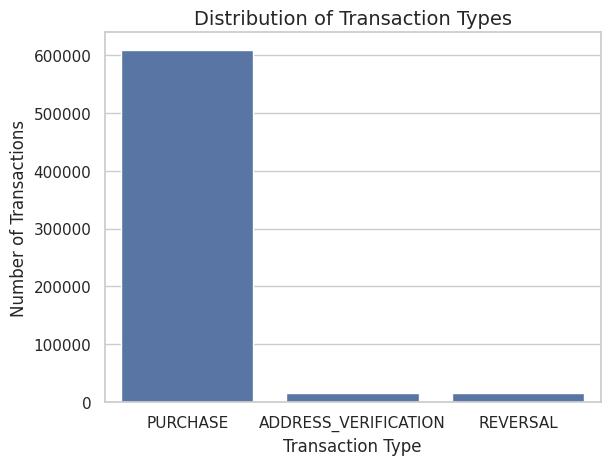

In [ ]:
sns.countplot(data=df_data, x="transactionType")
plt.title("Distribution of Transaction Types", fontsize=14)
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the most frequent transaction type falls under the purchase category.

2. cardPresent

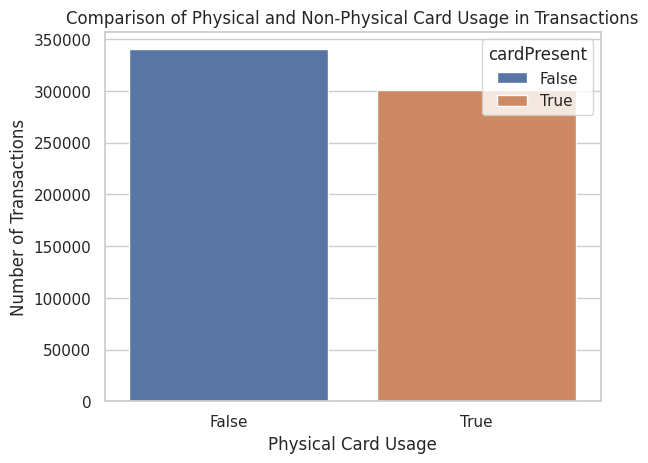

In [ ]:
sns.barplot(df_data.cardPresent.value_counts().reset_index(), x="cardPresent", y="count", hue="cardPresent")
plt.title("Comparison of Physical and Non-Physical Card Usage in Transactions")
plt.xlabel("Physical Card Usage")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that more transactions are conducted using non-physical cards.

3. merchantName

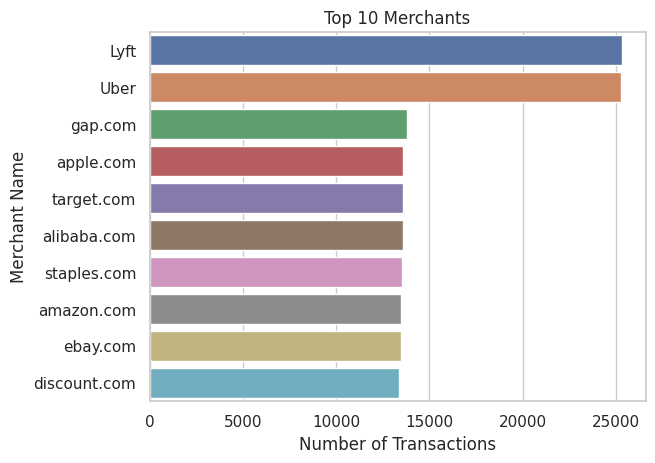

In [ ]:
sns.barplot(df_data.merchantName.value_counts().head(10).reset_index(), x="count", y="merchantName", hue="merchantName")
plt.title("Top 10 Merchants")
plt.xlabel("Number of Transactions")
plt.ylabel("Merchant Name")
plt.show()

From the chart, it can be concluded that among the 10 most frequently appearing merchants, the top two are Lyft and Uber.

4. merchantCategoryCode

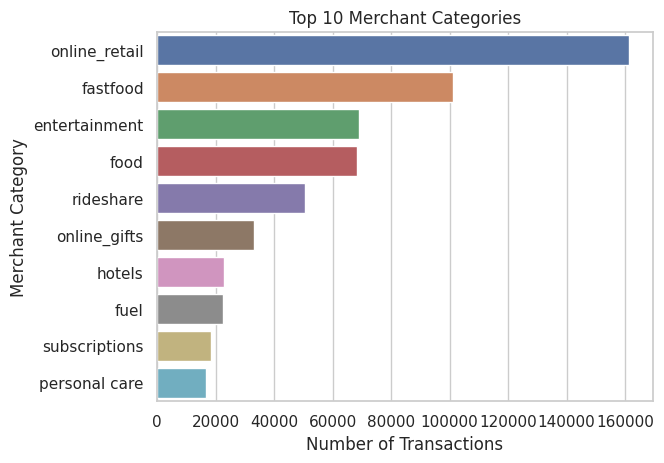

In [ ]:
sns.barplot(df_data.merchantCategoryCode.value_counts().head(10).reset_index(), x="count", y="merchantCategoryCode", hue="merchantCategoryCode")
plt.title("Top 10 Merchant Categories")
plt.xlabel("Number of Transactions")
plt.ylabel("Merchant Category")
plt.show()

From the chart, it can be concluded that among the 10 most frequent merchant categories, the top two are online retail and fast food.

5. merchantCountryCode

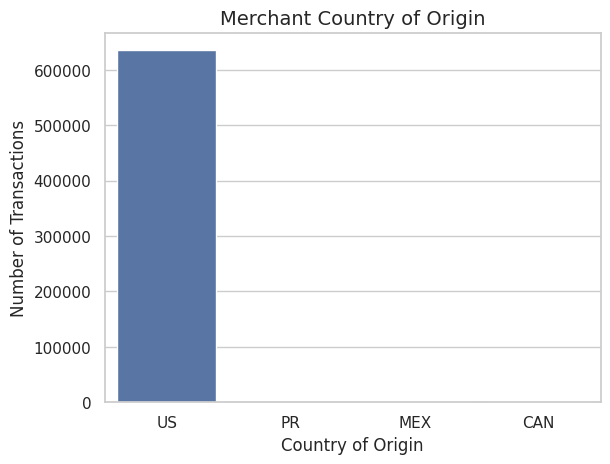

In [ ]:
sns.countplot(data=df_data, x="merchantCountryCode")
plt.title("Merchant Country of Origin", fontsize=14)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that most transactions are conducted with merchants originating from the country coded as US.

6. acqCountry

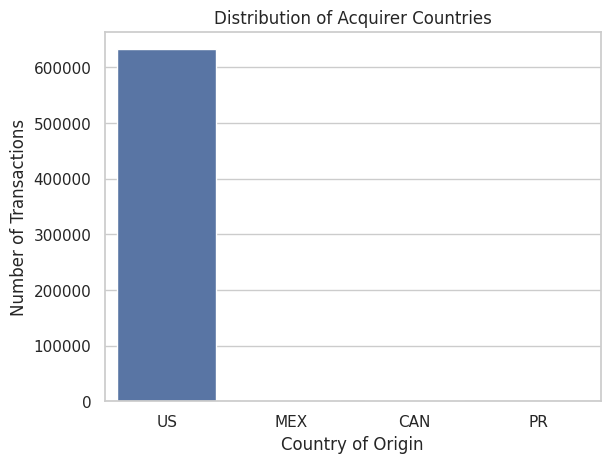

In [ ]:
sns.barplot(df_data.acqCountry.value_counts().reset_index(), x="acqCountry", y="count", hue="acqCountry")
plt.title("Distribution of Acquirer Countries")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the largest acquiring country is the US.

7. isFraud

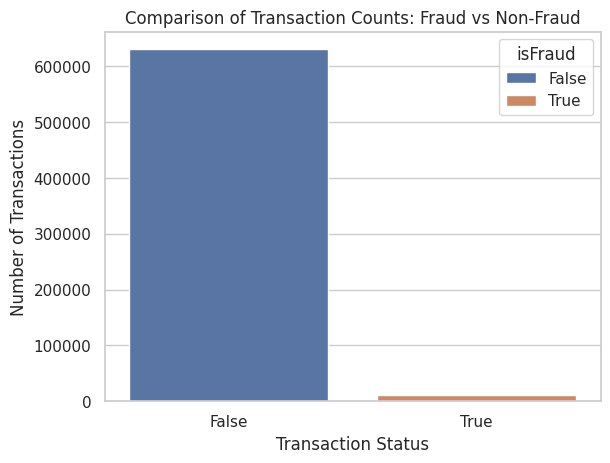

In [ ]:
# Count the number of transactions by fraud status
fraud_count = df_data.isFraud.value_counts().reset_index()
fraud_count.columns = ["isFraud", "count"]

sns.barplot(data=fraud_count, x="isFraud", y="count", hue="isFraud")
plt.title("Comparison of Transaction Counts: Fraud vs Non-Fraud")
plt.xlabel("Transaction Status")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the number of fraudulent transactions is significantly lower than non-fraudulent transactions.

### Exploration of Numeric Data Types

1. creditLimit

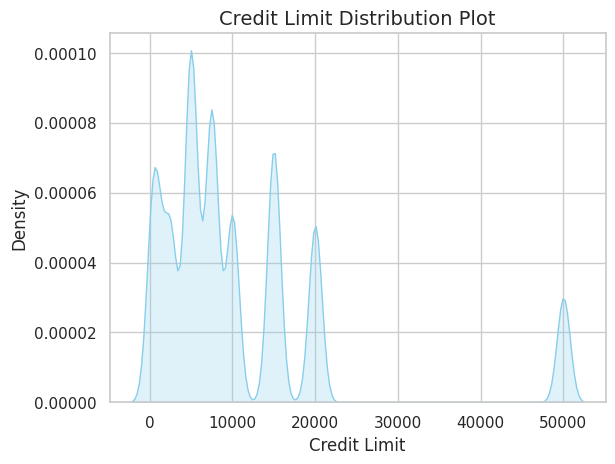

In [ ]:
sns.kdeplot(data=df_data["creditLimit"], fill=True, color="skyblue")
plt.title("Credit Limit Distribution Plot", fontsize=14)
plt.xlabel("Credit Limit")
plt.ylabel("Density")
plt.show()

In [ ]:
print("Skewness: ", df_data.creditLimit.skew())

Skewness:  2.294548813378859


Most customers have credit limits in the range of 0–30,000, while only a small number fall within the 40,000–50,000 range. A skewness value of 2.29 confirms that the distribution is strongly right-skewed, indicating that the majority of customers have relatively low credit limits, with only a few having very high limits.

2. availableMoney

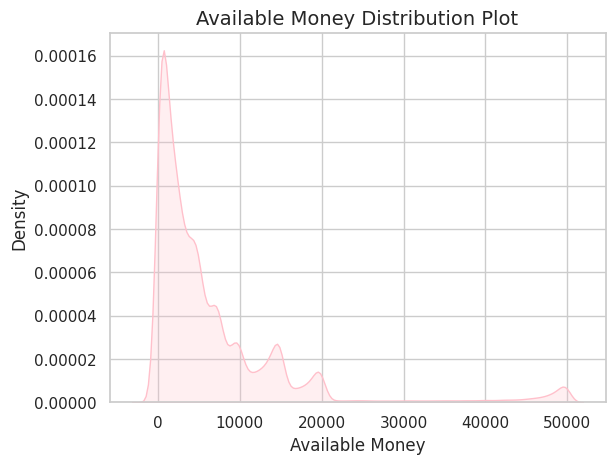

In [ ]:
sns.kdeplot(data=df_data["availableMoney"], fill=True, color="pink")
plt.title("Available Money Distribution Plot", fontsize=14)
plt.xlabel("Available Money")
plt.ylabel("Density")
plt.show()

In [ ]:
print("Skewness: ", df_data.availableMoney.skew())

Skewness:  2.888834824892849


With a skewness value of 2.8888, the distribution of available money is highly right-skewed. This indicates that most customers have only a small amount of available funds (0–10,000). However, a small number of customers have significantly higher available funds (40,000–50,000), creating a long right tail in the distribution.

3. transactionAmount

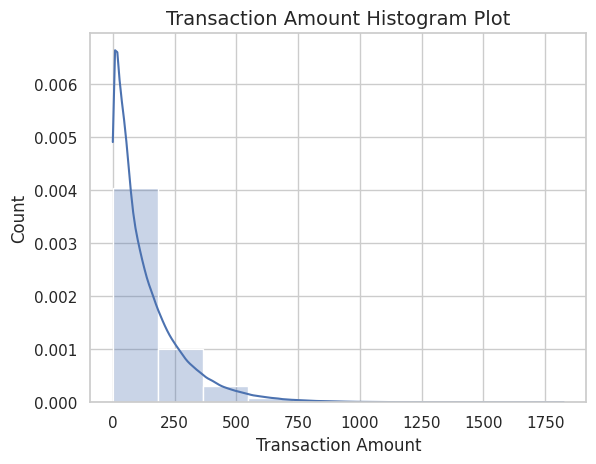

In [ ]:
sns.histplot(x=df_data["transactionAmount"], bins=10, kde=True, stat="density", alpha=0.3)
plt.title("Transaction Amount Histogram Plot", fontsize=14)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Skewness: ", df_data.transactionAmount.skew())

Skewness:  2.09571515354587


With a skewness value of 2.0957, the transaction amount distribution is right-skewed. This indicates that most customers conduct transactions with relatively small amounts (0–750).

4. currentBalance

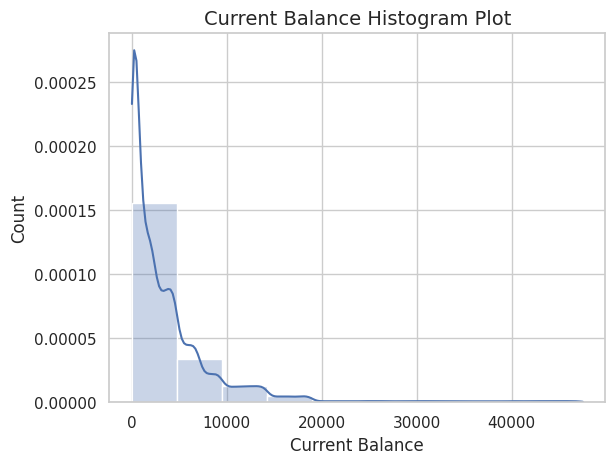

In [ ]:
sns.histplot(x=df_data["currentBalance"], bins=10, kde=True, stat="density", alpha=0.3)
plt.title("Current Balance Histogram Plot", fontsize=14)
plt.xlabel("Current Balance")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Skewness: ", df_data.currentBalance.skew())

Skewness:  3.600021657637472


With a skewness value of 3.6000, the current balance distribution is highly right-skewed. This means that most customers use their credit cards for small to moderate amounts (0–10,000), while only a few customers have very high utilized balances (above 10,000).

## Bivariate Analysis

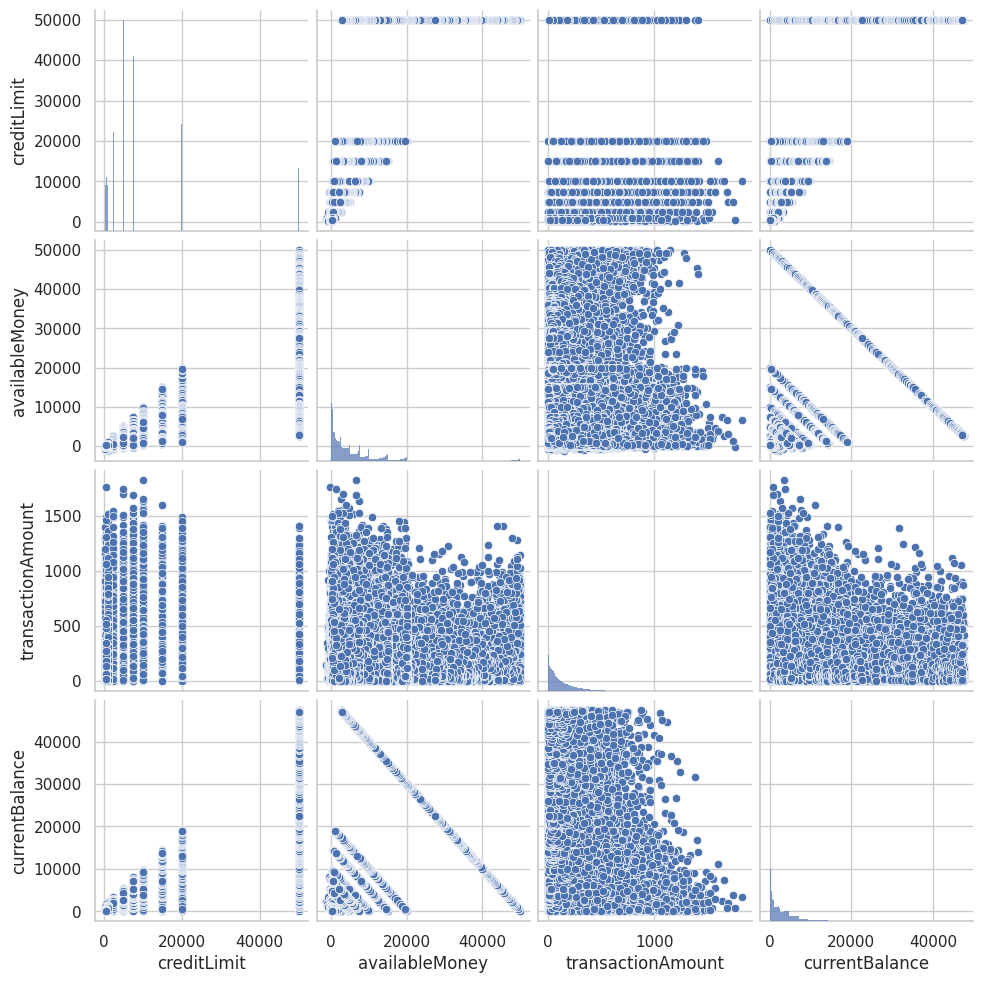

In [ ]:
sns.pairplot(df_data[["creditLimit", "availableMoney", "transactionAmount", "currentBalance"]])
plt.show()

The pairplot is used to explore bivariate relationships among numerical variables by visualizing all possible pairwise combinations in the form of scatter plots, while also showing the distribution of each variable along the diagonal. Its purpose is to identify patterns such as linear or non-linear relationships, potential correlations, and the presence of outliers between variables like credit limit, available money, transaction amount, and current balance.

This visualization provides an intuitive overview of how variables interact with one another and serves as an important exploratory step before applying statistical analysis or predictive modeling.

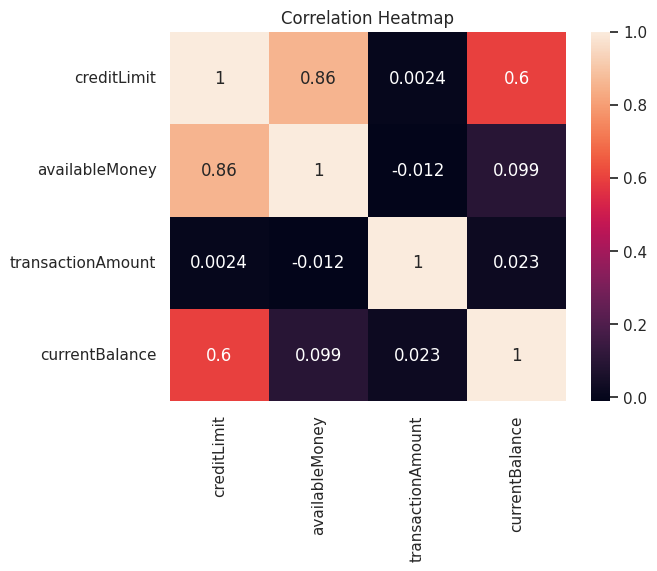

In [ ]:
sns.heatmap(df_data[["creditLimit", "availableMoney", "transactionAmount", "currentBalance"]].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap is used to quantitatively measure and visualize the strength and direction of linear relationships between numerical variables using correlation coefficients. By representing correlation values in a color-coded matrix, the heatmap makes it easy to identify variables with strong positive or negative correlations and to detect potential multicollinearity issues.

This analysis is particularly useful for understanding variable dependencies and for selecting relevant features in further statistical analysis or modeling.

# Data Transformation

In [ ]:
df_data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,186770399,186770399,7500,2574.02,2016-12-04T12:29:21,5.37,Apple iTunes,US,US,5.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,4925.98,False,False
641910,186770399,186770399,7500,2568.65,2016-12-09T04:20:35,223.70,Blue Mountain eCards,US,US,9.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,4931.35,False,False
641911,186770399,186770399,7500,2344.95,2016-12-16T07:58:23,138.42,Fresh Flowers,US,US,2.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,5155.05,False,False
641912,186770399,186770399,7500,2206.53,2016-12-19T02:30:35,16.31,abc.com,US,US,9.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,5293.47,False,False


The data transformation process prepares the dataset for clustering by removing irrelevant columns, handling missing values, reducing the impact of outliers, and checking duplicates.

These steps improve data quality and ensure the patterns identified by the model are more accurate and reliable.

### Drop Column

Before performing clustering, create a copy of the dataframe and drop columns that are not required.

In [ ]:
df_clean = df_data.drop([
    'accountNumber',
    'customerId',
    'cardLast4Digits',
    'transactionDateTime',
    'currentExpDate',
    'accountOpenDate',
    'dateOfLastAddressChange',
    'merchantName',
    'enteredCVV',
    'cardCVV',
    'isFraud',
    'expirationDateKeyInMatch',
    'posEntryMode',
    'posConditionCode',
    'merchantCategoryCode'
], axis=1).copy()

Check the new dataframe after dropping the selected columns.

In [ ]:
df_clean

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,transactionType,currentBalance,cardPresent
0,5000,5000.00,111.33,US,US,PURCHASE,0.00,False
1,5000,4888.67,24.75,US,US,PURCHASE,111.33,False
2,5000,4863.92,187.40,US,US,PURCHASE,136.08,False
3,5000,4676.52,227.34,US,US,PURCHASE,323.48,False
4,5000,4449.18,0.00,US,US,ADDRESS_VERIFICATION,550.82,False
...,...,...,...,...,...,...,...,...
641909,7500,2574.02,5.37,US,US,PURCHASE,4925.98,False
641910,7500,2568.65,223.70,US,US,PURCHASE,4931.35,False
641911,7500,2344.95,138.42,US,US,PURCHASE,5155.05,False
641912,7500,2206.53,16.31,US,US,PURCHASE,5293.47,False


### Handling Missing Values

In [ ]:
df_clean.isnull().sum()

,0
creditLimit,0
availableMoney,0
transactionAmount,0
acqCountry,3913
merchantCountryCode,624
transactionType,589
currentBalance,0
cardPresent,0


Handling missing values using fillna.

In [ ]:
# Missing values in acqCountry

df_clean["acqCountry"] = df_clean["acqCountry"].fillna("Unknown")
print(df_clean["acqCountry"])

0         US
1         US
2         US
3         US
4         US
          ..
641909    US
641910    US
641911    US
641912    US
641913    US
Name: acqCountry, Length: 641914, dtype: object


In [ ]:
# Missing values in merchantCountryCode

df_clean["merchantCountryCode"] = df_clean["merchantCountryCode"].fillna("Unknown")
print(df_clean["merchantCountryCode"])

0         US
1         US
2         US
3         US
4         US
          ..
641909    US
641910    US
641911    US
641912    US
641913    US
Name: merchantCountryCode, Length: 641914, dtype: object


In [ ]:
# Missing values in transactionType

df_clean["transactionType"] = df_clean["transactionType"].fillna("Unknown")
print(df_clean["transactionType"])

0                     PURCHASE
1                     PURCHASE
2                     PURCHASE
3                     PURCHASE
4         ADDRESS_VERIFICATION
                  ...         
641909                PURCHASE
641910                PURCHASE
641911                PURCHASE
641912                PURCHASE
641913                PURCHASE
Name: transactionType, Length: 641914, dtype: object


In [ ]:
df_clean.isnull().sum()

,0
creditLimit,0
availableMoney,0
transactionAmount,0
acqCountry,0
merchantCountryCode,0
transactionType,0
currentBalance,0
cardPresent,0


### Handling Outliers

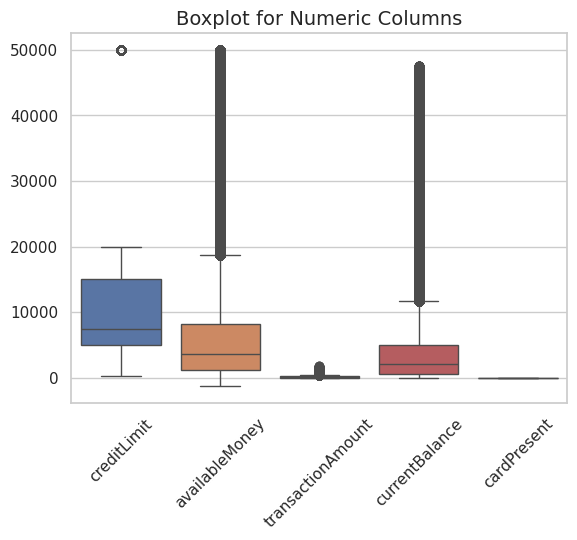

In [ ]:
sns.boxplot(df_clean)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns", fontsize="14")
plt.show()

In [ ]:
df_clean.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


In [ ]:
# List of numeric columns for outlier removal
num_cols = [
    'creditLimit',
    'availableMoney',
    'currentBalance',
    'transactionAmount',
]

# Loop through each column
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filter outliers
    df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) |
                          (df_clean[col] > (Q3 + 1.5 * IQR)))]

# Check the shape after dropping outliers
print(df_clean.shape)

(515673, 8)


### Handling Duplicates

In [ ]:
df_clean.duplicated().sum()

np.int64(6353)

Check duplicated records and compare them with the original dataframe before performing duplicate removal.

In [ ]:
df_clean[df_clean.duplicated()].head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,transactionType,currentBalance,cardPresent
204,5000,5000.00,23.33,US,US,PURCHASE,0.00,True
207,5000,5000.00,23.33,US,US,PURCHASE,0.00,True
259,250,250.00,27.04,US,US,PURCHASE,0.00,True
641,7500,5668.92,0.00,US,US,ADDRESS_VERIFICATION,1831.08,False
1368,2500,1072.28,0.00,US,US,ADDRESS_VERIFICATION,1427.72,False


In [ ]:
idx = df_clean[df_clean.duplicated()].index[:5]
df_data.loc[idx]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
204,578754168,578754168,5000,5000.00,2016-10-03T13:25:19,23.33,Shell Gas #69785,US,US,5.0,...,21/10/2015,21/10/2015,413,413,5279,PURCHASE,False,0.00,True,False
207,578754168,578754168,5000,5000.00,2016-11-01T03:55:50,23.33,Shell Gas #69785,US,US,5.0,...,21/10/2015,21/10/2015,413,413,5279,PURCHASE,False,0.00,True,False
259,550655231,550655231,250,250.00,2016-11-10T01:44:26,27.04,Mobil Gas #610818,US,US,5.0,...,15/3/2013,15/3/2013,631,631,9626,PURCHASE,False,0.00,True,False
641,668767297,668767297,7500,5668.92,2016-03-25T04:39:12,0.00,Franks Pub #680641,US,US,5.0,...,4/2/2011,4/2/2011,662,662,5399,ADDRESS_VERIFICATION,False,1831.08,False,False
1368,784469543,784469543,2500,1072.28,2016-09-10T14:28:25,0.00,Renaissance Hotel #710802,US,US,80.0,...,21/8/2008,9/4/2016,479,479,8915,ADDRESS_VERIFICATION,False,1427.72,False,False


In [ ]:
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

# Data Preprocessing

Data preprocessing converts categorical variables into numerical form so they can be processed by machine learning algorithms, with one-hot encoding used as one example of this conversion method to avoid false ordering and misinterpretation of category relationships.

In addition, all features are scaled using RobustScaler to reduce the influence of outliers and ensure features are on a comparable scale. Together, these steps improve data quality and help clustering algorithms identify more accurate and unbiased patterns.

### Encoding Categorical Value

In [ ]:
df_clean

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,transactionType,currentBalance,cardPresent
0,5000,5000.00,111.33,US,US,PURCHASE,0.00,False
1,5000,4888.67,24.75,US,US,PURCHASE,111.33,False
2,5000,4863.92,187.40,US,US,PURCHASE,136.08,False
3,5000,4676.52,227.34,US,US,PURCHASE,323.48,False
4,5000,4449.18,0.00,US,US,ADDRESS_VERIFICATION,550.82,False
...,...,...,...,...,...,...,...,...
509315,7500,2574.02,5.37,US,US,PURCHASE,4925.98,False
509316,7500,2568.65,223.70,US,US,PURCHASE,4931.35,False
509317,7500,2344.95,138.42,US,US,PURCHASE,5155.05,False
509318,7500,2206.53,16.31,US,US,PURCHASE,5293.47,False


Perform encoding on all categorical data types and rename specific variables if needed.

In [ ]:
# Rename the cardPresent column
df_clean.rename(columns={"cardPresent": "card_present"}, inplace=True)

# Create an inverse column (0 = present, 1 = not present)
df_clean["card_is_not_present"] = df_clean.card_present.apply(lambda x: 0 if x == 1 else 1)

# Drop the original column
df_clean = df_clean.drop(columns=["card_present"])

The use of One-Hot Encoding for categorical feature processing is chosen because the data type consists of nominal categories (categories without any inherent order or ranking).

One-Hot Encoding converts each category into a separate binary column, ensuring that no false ordinal meaning is introduced. This approach provides a more accurate representation of categorical data and is suitable for algorithms such as K-Means, resulting in more objective clusters that better reflect the true patterns in the data.

In [ ]:
# List of categorical columns for one-hot encoding
categorical_cols = [
    "transactionType",
    "merchantCountryCode",
    "acqCountry",
]

# Apply one-hot encoding
df_clean = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    prefix=[col.split("C")[0].lower() for col in categorical_cols],  # create simple prefixes
    drop_first=False
)

In [ ]:
# Remaining numerical columns:
numeric_cols = ["creditLimit", "availableMoney", "transactionAmount", "currentBalance"]

# Check dataframe columns
print(df_clean.columns)

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'card_is_not_present', 'transactiontype_ADDRESS_VERIFICATION',
       'transactiontype_PURCHASE', 'transactiontype_REVERSAL',
       'transactiontype_Unknown', 'merchant_CAN', 'merchant_MEX',
       'merchant_PR', 'merchant_US', 'merchant_Unknown', 'acq_CAN', 'acq_MEX',
       'acq_PR', 'acq_US', 'acq_Unknown'],
      dtype='object')


In [ ]:
df_clean

,creditLimit,availableMoney,transactionAmount,currentBalance,card_is_not_present,transactiontype_ADDRESS_VERIFICATION,transactiontype_PURCHASE,transactiontype_REVERSAL,transactiontype_Unknown,merchant_CAN,merchant_MEX,merchant_PR,merchant_US,merchant_Unknown,acq_CAN,acq_MEX,acq_PR,acq_US,acq_Unknown
0,5000,5000.00,111.33,0.00,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
1,5000,4888.67,24.75,111.33,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2,5000,4863.92,187.40,136.08,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
3,5000,4676.52,227.34,323.48,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,5000,4449.18,0.00,550.82,1,True,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509315,7500,2574.02,5.37,4925.98,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509316,7500,2568.65,223.70,4931.35,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509317,7500,2344.95,138.42,5155.05,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509318,7500,2206.53,16.31,5293.47,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False


Use RobustScaler to normalize the data so that all features are on a comparable scale. RobustScaler is selected because it is more resistant to outliers compared to other scalers that are sensitive to extreme values. By transforming the data using the median and IQR, feature scaling becomes more stable, leading to more accurate and unbiased clustering results.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_clean)

Recheck the dataframe to ensure the encoding process has been applied correctly.

In [ ]:
df_clean

,creditLimit,availableMoney,transactionAmount,currentBalance,card_is_not_present,transactiontype_ADDRESS_VERIFICATION,transactiontype_PURCHASE,transactiontype_REVERSAL,transactiontype_Unknown,merchant_CAN,merchant_MEX,merchant_PR,merchant_US,merchant_Unknown,acq_CAN,acq_MEX,acq_PR,acq_US,acq_Unknown
0,5000,5000.00,111.33,0.00,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
1,5000,4888.67,24.75,111.33,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2,5000,4863.92,187.40,136.08,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
3,5000,4676.52,227.34,323.48,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,5000,4449.18,0.00,550.82,1,True,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509315,7500,2574.02,5.37,4925.98,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509316,7500,2568.65,223.70,4931.35,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509317,7500,2344.95,138.42,5155.05,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False
509318,7500,2206.53,16.31,5293.47,1,False,True,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_clean.shape

(509320, 19)

# Data Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
# Since the dataset is large, use sampling to simplify the clustering process

sample_size = 20000
df_sample = df_clean.sample(sample_size, random_state=42)

In [ ]:
X_sample_scaled = scaler.fit_transform(df_sample.drop(columns=["cluster"], errors='ignore'))

### Elbow Method for Optimal k

The Elbow Method is used to determine the optimal number of clusters by analyzing how the within-cluster variance (inertia) decreases as the number of clusters increases. The optimal value of *k* is identified at the point where adding more clusters results in diminishing improvements, helping balance model simplicity and clustering effectiveness.

In [ ]:
inertia_values = []
k_ranges = range(1, 11)

for k in k_ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_sample_scaled)
    inertia_values.append(kmeans.inertia_)

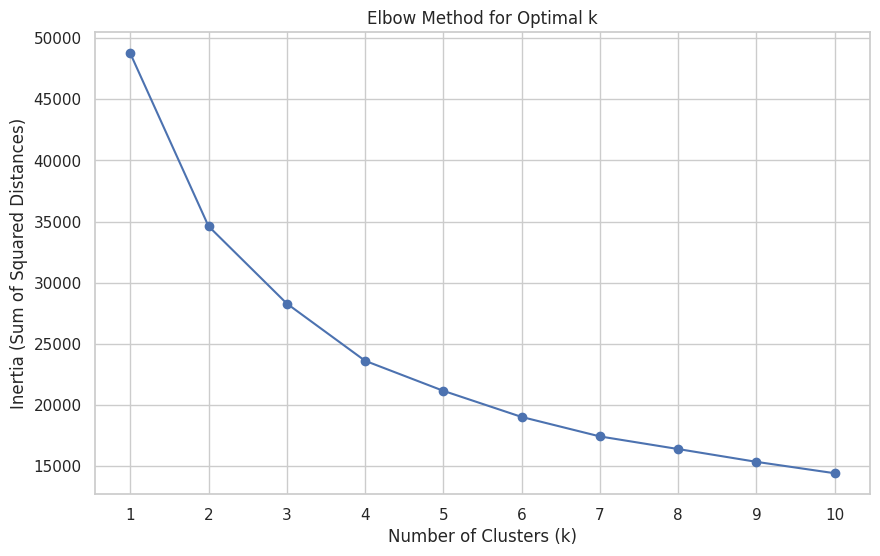

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_ranges, inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_ranges)
plt.grid(True)
plt.show()

### Silhouette Analysis for Optimal k

After the Elbow Method provides an estimate of the optimal number of clusters, the Silhouette Score is used to evaluate how well the clusters are formed. A higher Silhouette Score indicates clearer and more well-separated clusters.

In [ ]:
best_score = -1
best_k = 0

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample_scaled)
    score = silhouette_score(X_sample_scaled, labels)
    print(f"k = {k}, silhouette score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

k = 2, silhouette score = 0.3161
k = 3, silhouette score = 0.2651
k = 4, silhouette score = 0.2721
k = 5, silhouette score = 0.2466
k = 6, silhouette score = 0.2465
k = 7, silhouette score = 0.2469
k = 8, silhouette score = 0.2489
k = 9, silhouette score = 0.2558
k = 10, silhouette score = 0.2606


In [ ]:
# Assign clusters to the full dataset using best_k
X_scaled_full = scaler.fit_transform(df_clean.drop(columns=["cluster"], errors='ignore'))
kmeans_full = KMeans(n_clusters=best_k, random_state=42)
df_clean['cluster'] = kmeans_full.fit_predict(X_scaled_full)

In [ ]:
# Check cluster distribution
print(f"Optimal number of clusters: {best_k} with sample silhouette score {best_score:.4f}")
print(df_clean['cluster'].value_counts())

Optimal number of clusters: 2 with sample silhouette score 0.3161
cluster
1    355538
0    153782
Name: count, dtype: int64


### K-Means Clustering with Optimal k

In [ ]:
kmeans_sample = KMeans(n_clusters=best_k, random_state=42)
sample_labels = kmeans_sample.fit_predict(X_sample_scaled)
clusters_sample = sample_labels

### Dimentionality Reduction

This step is used to reduce the number of features while preserving the most important information in the data. Its main function is to simplify complex, high-dimensional datasets, improve computational efficiency, reduce noise and multicollinearity, and make patterns or clusters easier to detect and visualize, especially in tasks such as clustering and modeling.

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_sample_scaled)

### Clustering Visualization

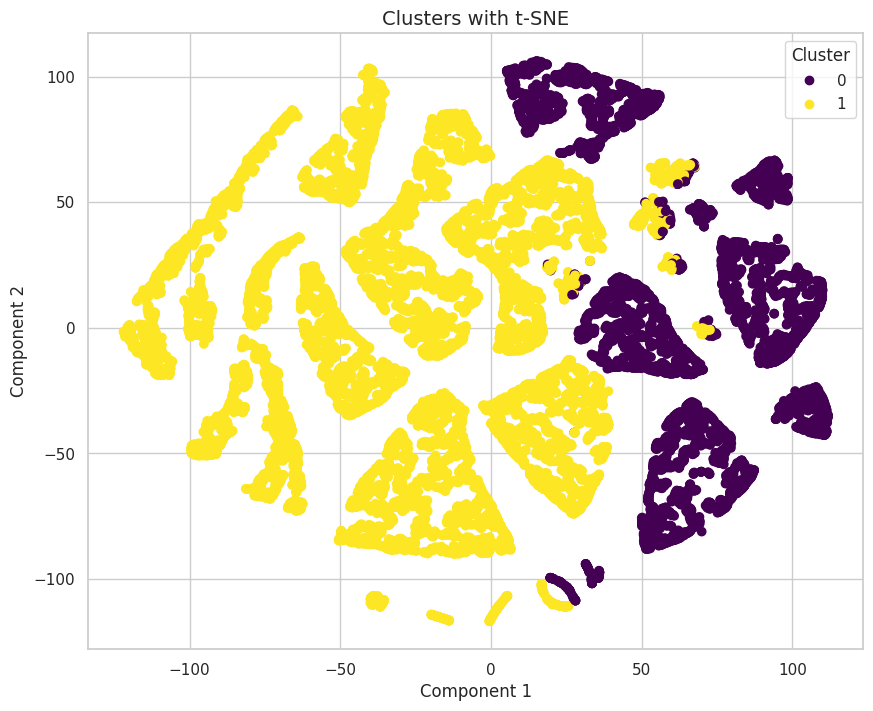

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=clusters_sample,
    cmap="viridis"
)
plt.title("Clusters with t-SNE", fontsize=14)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

## Cluster Summary

In [ ]:
# Separate numeric and categorical (one-hot encoded) columns
numeric_cols = ["creditLimit", "availableMoney", "transactionAmount", "currentBalance"]
categorical_cols = [col for col in df_clean.columns if col not in numeric_cols + ["cluster"]]

# Numeric summary
numeric_summary = df_clean.groupby("cluster")[numeric_cols] \
    .agg(['median']) \
    .round(2)

# Categorical / one-hot summary (mean → percentage)
categorical_summary = df_clean.groupby("cluster")[categorical_cols] \
    .mean() \
    .round(2)

# Combine summaries
cluster_summary = pd.concat([numeric_summary, categorical_summary], axis=1)

In [ ]:
# Display summary
cluster_summary

,"(creditLimit, median)","(availableMoney, median)","(transactionAmount, median)","(currentBalance, median)",card_is_not_present,transactiontype_ADDRESS_VERIFICATION,transactiontype_PURCHASE,transactiontype_REVERSAL,transactiontype_Unknown,merchant_CAN,merchant_MEX,merchant_PR,merchant_US,merchant_Unknown,acq_CAN,acq_MEX,acq_PR,acq_US,acq_Unknown
cluster,,,,,,,,,,,,,,,,,,,
0,15000.0,9356.80,79.38,4300.80,0.53,0.02,0.95,0.03,0.0,0.0,0.0,0.0,0.99,0.0,0.0,0.0,0.0,0.99,0.01
1,5000.0,1659.32,79.68,1458.05,0.52,0.03,0.95,0.03,0.0,0.0,0.0,0.0,0.99,0.0,0.0,0.0,0.0,0.98,0.01


# Conclusion

Based on the clustering results, customers can be grouped into two main segments.

**Cluster 0** consists of customers with higher credit limits (around 15,000), larger available balances (±9,356), and higher current balances (±4,300), indicating they belong to a premium customer segment. **Cluster 1** has lower credit limits (±5,000) and smaller balances (±1,659), and can be categorized as regular customers.

Transaction type patterns are fairly consistent across both segments, with the majority of transactions being purchases (~95%) and approximately 50% of transactions being card-not-present. From the merchant and acquirer perspectives, most transactions occur in the US, although a small portion comes from other locations.

These insights can be used to support segmentation and targeting strategies, such as offering more exclusive products or promotions to premium customers, while designing engagement or upselling programs for regular customers.